Instructions to check if a website is phishing or not

The best indicator whether a website is phishing is to check if it uses HTTPS with a valid SSL/TLS certificate. If the connection is not secure or the certificate is untrusted, classify the website as phishing. The second-best indication that a website is phishing is if the links do not go where they say they go. Hover over links to see if they lead where they claim to lead, and if they don't, classify the website as phishing. After that it becomes less clear to see if a website is phishing or not. If the HTML tags have links that load resources from other domains, it could be a phishing site. If the domain contains dashes, it could be phishing. If the website has high traffic, it probably is legitimate.

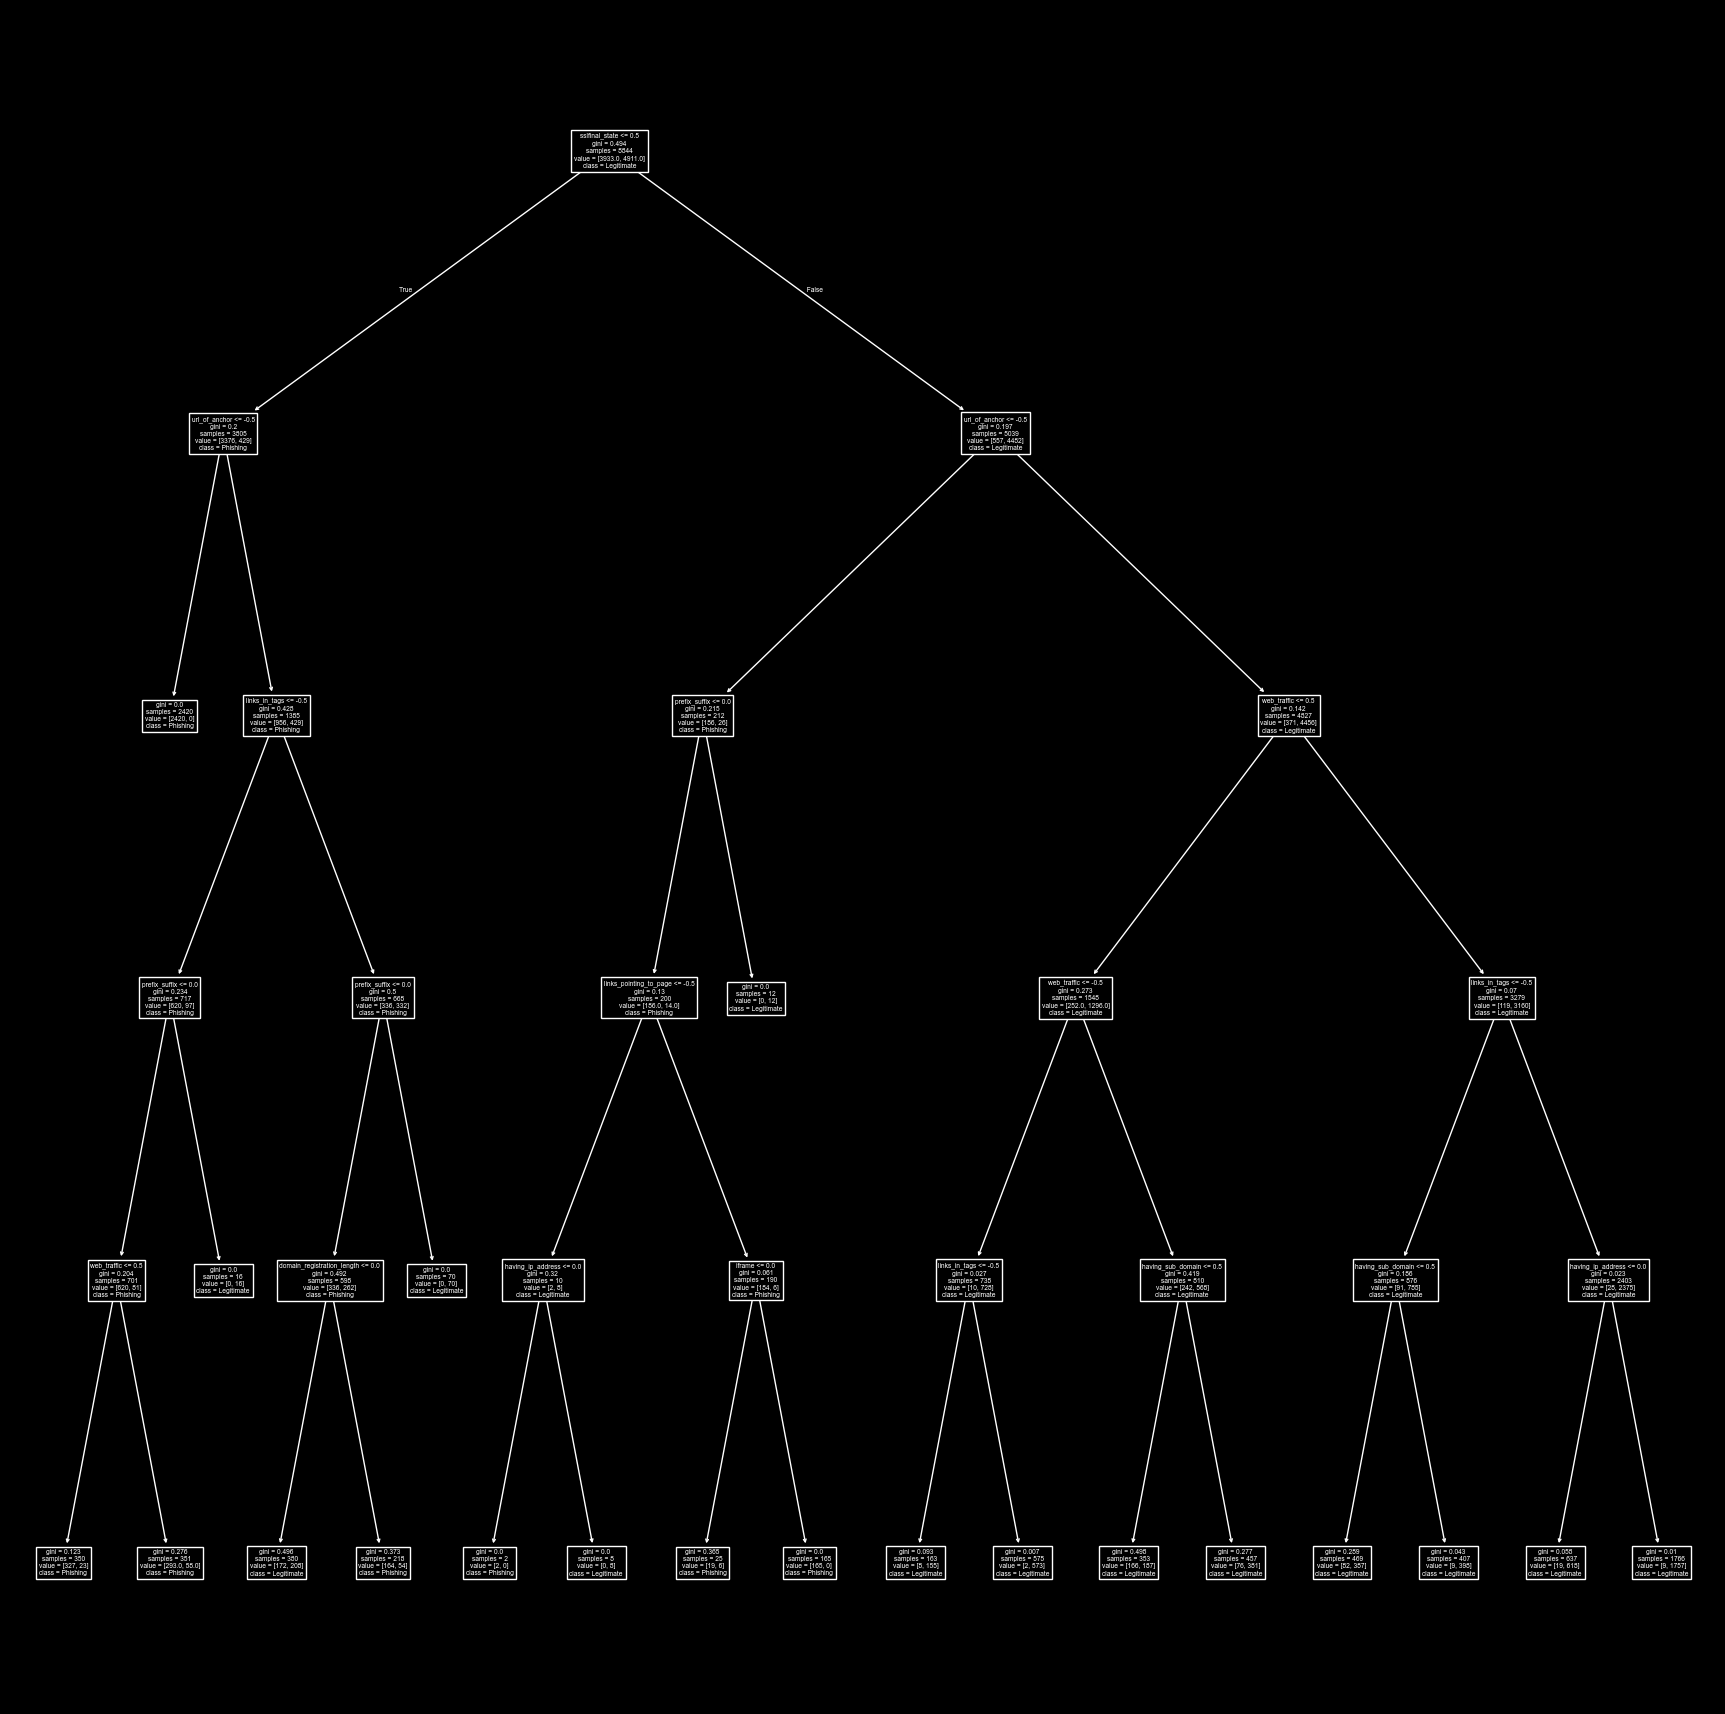

              precision    recall  f1-score   support

          -1       0.96      0.85      0.91       965
           1       0.90      0.98      0.93      1246

    accuracy                           0.92      2211
   macro avg       0.93      0.91      0.92      2211
weighted avg       0.93      0.92      0.92      2211



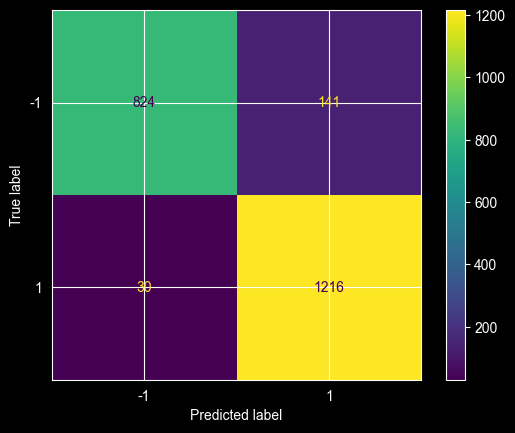

In [13]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestClassifier

# fetch dataset
phishing_websites = fetch_ucirepo(id=327)

# data (as pandas dataframes)
X = phishing_websites.data.features
y = phishing_websites.data.targets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5040)

modelTree = DecisionTreeClassifier(max_depth=3, random_state=5040)
modelTree.fit(X_train, y_train)

fig = plt.figure(figsize = (22, 22))
plot_tree(modelTree, feature_names = X.keys(), class_names = ['Phishing', 'Legitimate'])
plt.show()

predTree = modelTree.predict(X_test)
print(classification_report(y_test, predTree))
ConfusionMatrixDisplay.from_estimator(modelTree, X_test, y_test)

Here is the random forest trying to do the same thing as the decision tree. Overall it did not improve in any noticeable way. It did become more difficult to read, though.

Fold-specific accuracies: [0.90687161 0.90687161 0.91500904 0.91500904 0.920434   0.92941176
 0.91764706 0.90950226 0.92488688 0.92579186]
Overall accuracy (avg. of folds): 0.9171


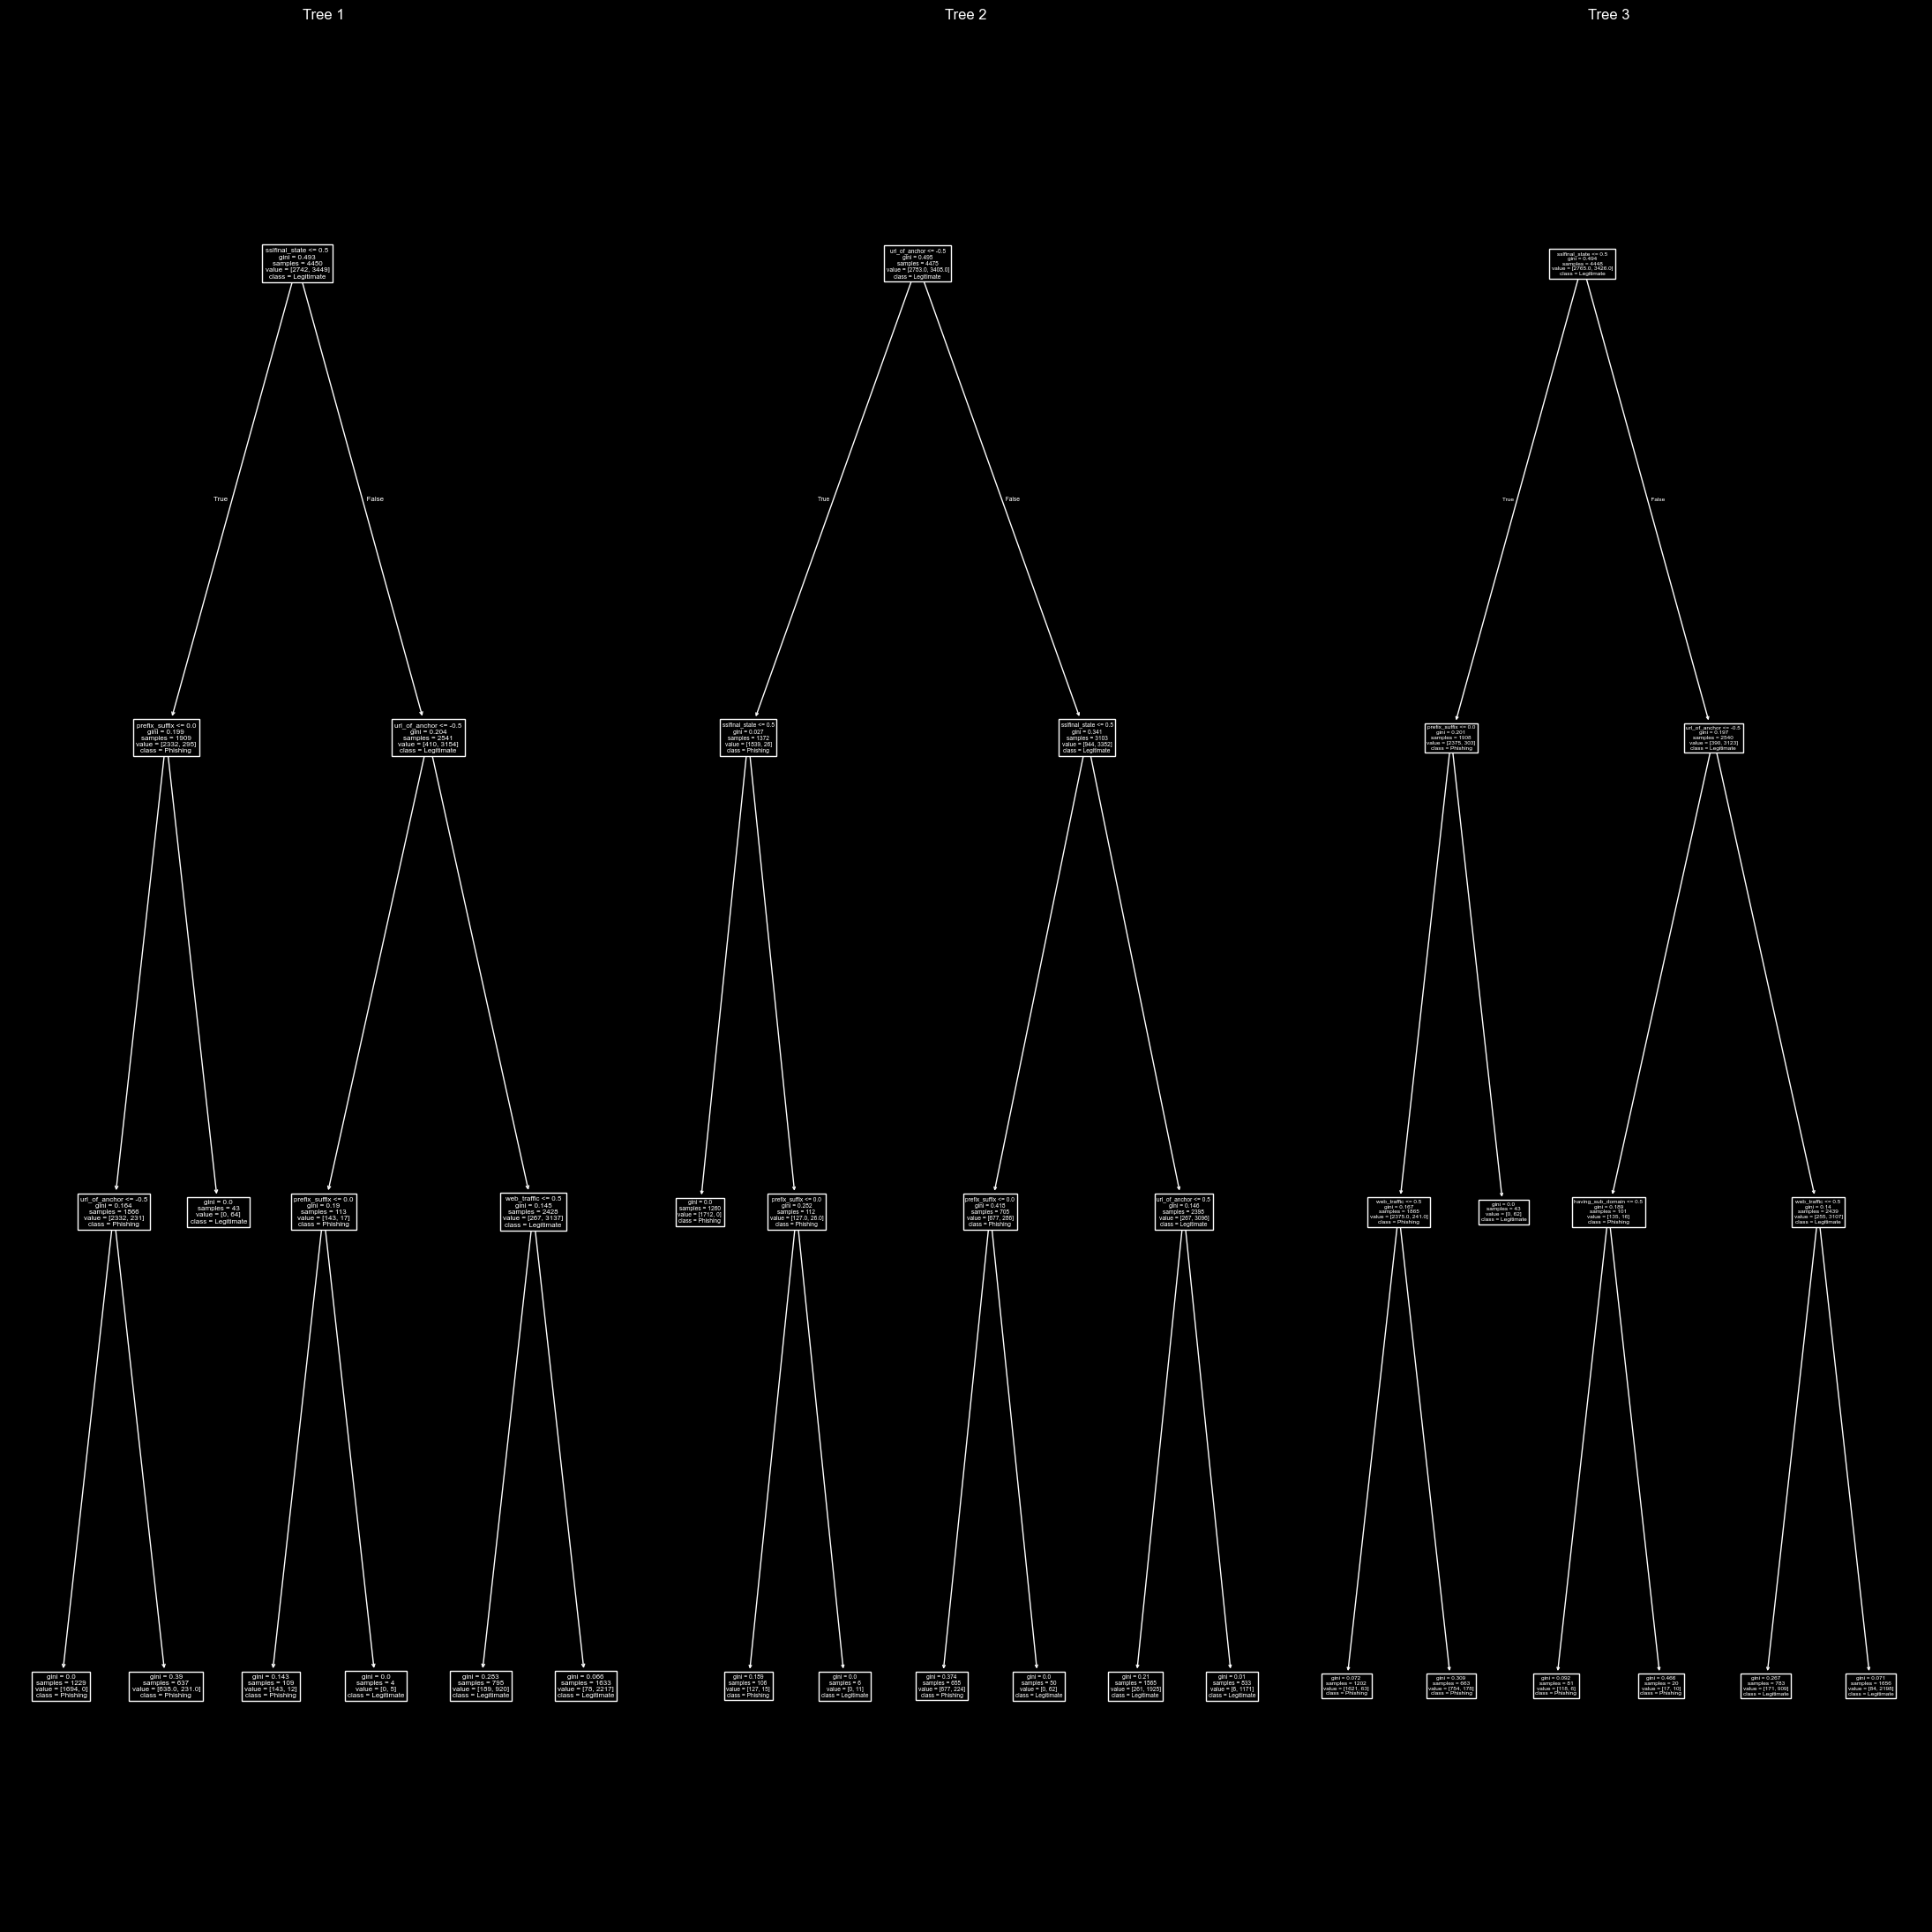

              precision    recall  f1-score   support

          -1       0.91      0.89      0.90       965
           1       0.92      0.93      0.93      1246

    accuracy                           0.91      2211
   macro avg       0.91      0.91      0.91      2211
weighted avg       0.91      0.91      0.91      2211



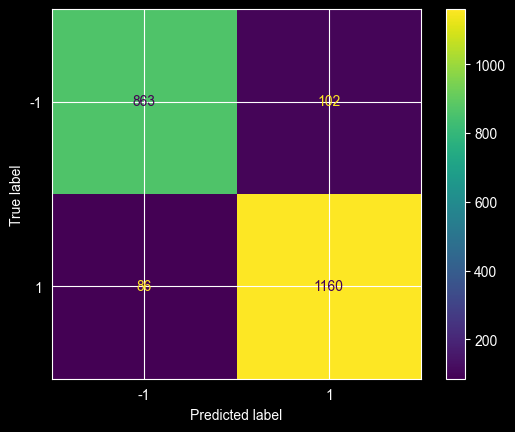

In [12]:
modelForest = RandomForestClassifier(n_estimators=100, bootstrap=True, max_samples=0.7, max_features=0.75, max_depth=3, random_state=5040)

modelForest.fit(X_train, y_train.to_numpy().reshape(-1))

n_trees_to_plot = 3

plt.figure(figsize=(22, 22))

for i in range(n_trees_to_plot):
    plt.subplot(1, n_trees_to_plot, i + 1)  # 1 row and n_trees_to_plot columns
    plot_tree(modelForest.estimators_[i], feature_names = X.keys(), class_names = ['Phishing', 'Legitimate'])
    plt.title(f'Tree {i + 1}')

plt.tight_layout()
plt.show()

predForest = modelForest.predict(X_test)
print(classification_report(y_test, predForest))
ConfusionMatrixDisplay.from_estimator(modelForest, X_test, y_test)